# MUSIC-GENRE CLASSIFICATION

###Data visualizing and exploring audio data

In [1]:

import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import librosa
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#let's explore our data set
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/genres_original/features_3_sec.csv")
df.describe()
#lets explore genres_original folder inside Data.zip
import os
path_genre='/content/drive/MyDrive/Colab Notebooks/genres_original'
#now let's print the folders or files that are inside genres_original folder
folders=os.listdir(path_genre)
for content in folders:
  print(content)

features_30_sec.csv
features_3_sec.csv
blues
disco
hiphop
reggae
country
pop
jazz
classical
metal
rock


In [5]:
#importing required libraries
import librosa
import numpy as np
#loading required audio file
#Sample Rate: Sample rate, also known as sampling frequency, is the number of samples of audio carried per second. It is measured in Hertz (Hz).,we are calculating it in KHz
audio_array,sample_rate=librosa.load(f'{path_genre}/disco/disco.00080.wav')
print('audio array:',audio_array,'\n')
print(' shape of audio array:',np.shape(audio_array),'\n')
print('sample rate(KHz):',sample_rate,'\n')
print('Length of audio (s):',len(audio_array)/sample_rate)

audio array: [ 0.03356934  0.03414917  0.02133179 ... -0.08337402 -0.06295776
 -0.04690552] 

 shape of audio array: (661504,) 

sample rate(KHz): 22050 

Length of audio (s): 30.00018140589569


In [6]:
#let's claculate tempo of the audio
#Tempo: Tempo refers to the speed or pace of a piece of music. It is typically measured in beats per minute (BPM).
tempo,_ =librosa.beat.beat_track(y=audio_array,sr=sample_rate)
print('Tempo:',tempo)

Tempo: 99.38401442307692


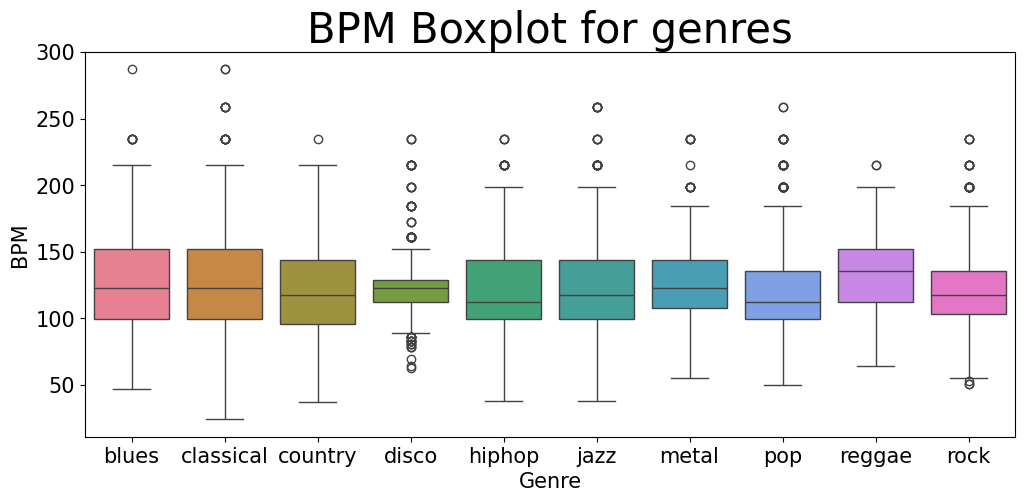

In [7]:
#let's set matplotlib to display plots inline
%matplotlib inline
#selecting label and tempo columns from dataframe
x=df[["label","tempo"]]
#now let's create a boxplot
fig,axis=plt.subplots(figsize=(12,5))
sns.boxplot(x='label',y='tempo',data=x,palette='husl')
#let's add title and labels
plt.title("BPM Boxplot for genres",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("BPM",fontsize=15)
#save the plot as an image
plt.savefig("BPM boxplot.jpg")

In [8]:
# Assume df is your DataFrame containing the data
# Ensure df, X, y, cols, min_max_scaler, np_scaled are not directly copied

# Extract features and target
data = df.iloc[:, 1:]
y = data['label']
X = data.drop(columns=['label'])

In [9]:
# Normalize X
scaler = preprocessing.MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [10]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])


In [11]:
# Concatenate with target label
final_df = pd.concat([principal_df, y], axis=1)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print results
print("Principal Components:")
print(principal_df.head())

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Principal Components:
   principal component 1  principal component 2
0              -0.242167              -0.121147
1              -0.276062              -0.230291
2              -0.190024              -0.119509
3              -0.278550              -0.167689
4              -0.309771              -0.187990

Explained Variance Ratio:
[0.26745621 0.18238003]


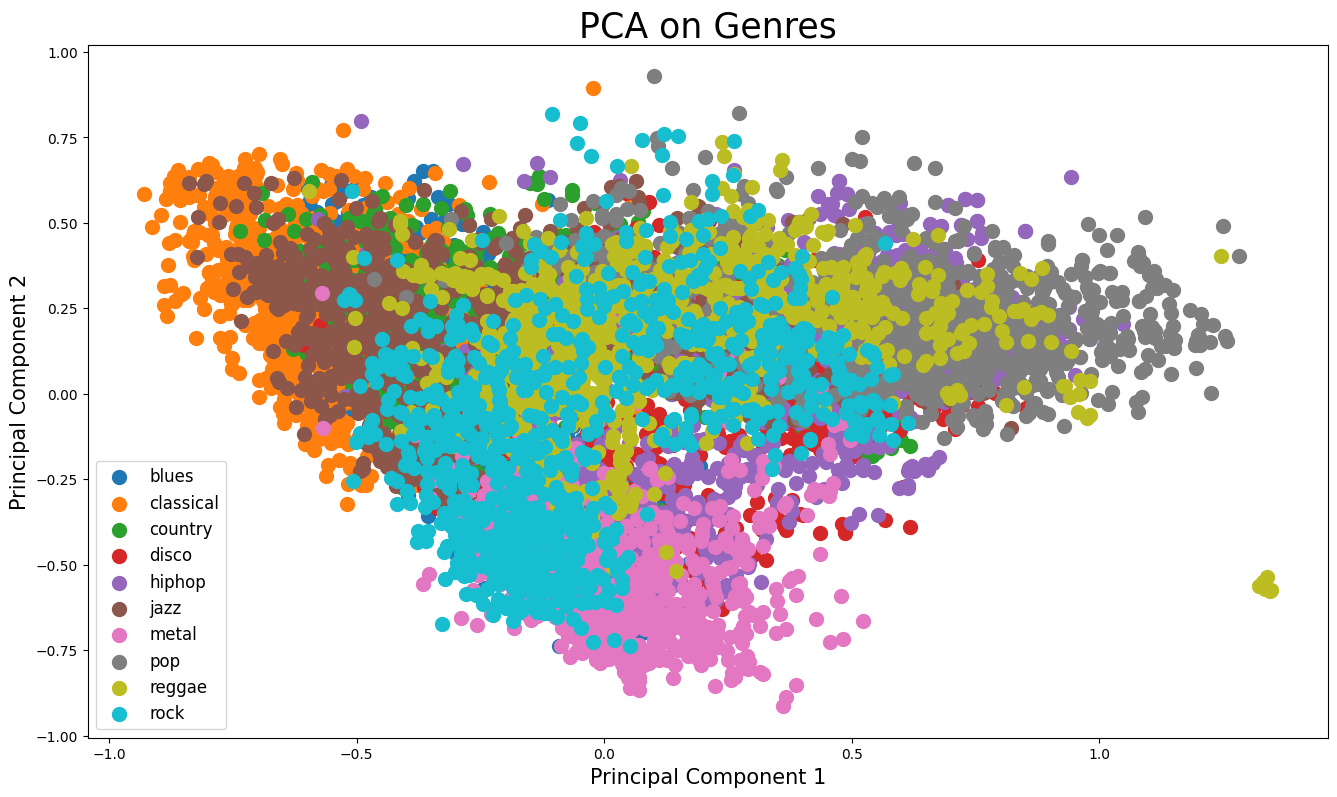

In [12]:
# Define the figure size
plt.figure(figsize=(16, 9))

# Assuming your DataFrame containing principal components and labels is named 'finalDf'
# Plot data points with different markers for each label
for label in final_df['label'].unique():
    subset = final_df[final_df['label'] == label]
    plt.scatter(subset['principal component 1'], subset['principal component 2'], label=label, s=100)

# Add title and labels
plt.title('PCA on Genres', fontsize=25)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)

# Add legend
plt.legend(fontsize=12)

# Save the plot
plt.savefig("PCA_Markers.jpg")

# Show plot
plt.show()

In [13]:
# Define the path to the directory containing the CSV file
general_path = '/content/drive/MyDrive/Colab Notebooks/genres_original/features_3_sec.csv'

# Load the CSV file
data = pd.read_csv(f'{general_path}')

# Exclude the first column assuming it's the index column
data = data.iloc[:, 1:]

# Display the first few rows of the dataframe
data.head()

from sklearn import preprocessing

# Assuming X and y are already defined

# Normalize X so everything is on the same scale
scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print the first few rows of the normalized data
print(X_scaled.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

   length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0     0.0          0.355399         0.716757  0.293133  0.107955   
1     0.0          0.367322         0.670347  0.253040  0.044447   
2     0.0          0.373159         0.728067  0.296753  0.141663   
3     0.0          0.399349         0.677066  0.298024  0.075042   
4     0.0          0.355668         0.689113  0.322308  0.052149   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.262173               0.034784                 0.459205   
1                0.270969               0.018716                 0.470831   
2                0.265293               0.023073                 0.494051   
3                0.238427               0.023187                 0.455246   
4                0.233460               0.016451                 0.451651   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0                0.094130      0.346153  ...     0.3636

###DECISION TREE CLASSIFIER

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score


In [15]:
DecisionTree=DecisionTreeClassifier()
# defining hyperparameters to tune
parameters={
    'min_samples_split':[1,3,5,7],
    'min_samples_leaf':[2,4,6,8],
    'max_depth':[1,2,3,4]
}
#perform grid search cross validation
grid_search=GridSearchCV(DecisionTree,parameters,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [1, 3, 5, 7]})

In [16]:
# now let's print the best parameters and their corresponding mean cross validated score
print("BEST PARAMETERS:",grid_search.best_params_)
print("BEST SCORE:",grid_search.best_score_)

BEST PARAMETERS: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 3}
BEST SCORE: 0.391765112895184


In [17]:
#now let's perform cross validation on our test set
cv_decisiontree=cross_val_score(grid_search.best_estimator_,X_test,y_test,cv=3)
# printing accuracy scores for each fold and the mean score
print("CROSS VALIDATION SCORES:",cv_decisiontree)
print("MEAN ACCURACY :",cv_decisiontree.mean())

CROSS VALIDATION SCORES: [0.37687688 0.38738739 0.36036036]
MEAN ACCURACY : 0.3748748748748749


###Using ADABOOST classifier

In [18]:
#importing required library
from sklearn.ensemble import AdaBoostClassifier


In [19]:
#intializing adaboost classifier
train_model_using_adaboost=AdaBoostClassifier()
#parameters
parameters={
    'n_estimators':[50,150,250],
    'learning_rate':[0.01,0.1,1.0]
}
#performing cross validation
adaboost_GridSearch=GridSearchCV(train_model_using_adaboost,parameters,cv=3,n_jobs=-1)
adaboost_GridSearch.fit(X_train,y_train)
print("BEST HYPERPARAMETERS: " ,adaboost_GridSearch.best_params_)
print("BEST SCORES :",adaboost_GridSearch.best_score_)

BEST HYPERPARAMETERS:  {'learning_rate': 0.1, 'n_estimators': 250}
BEST SCORES : 0.48235735735735735


In [20]:
#now let's perform cross validation on the test set
adaboost_cv_scores=cross_val_score(adaboost_GridSearch.best_estimator_,X_test,y_test,cv=3)
print("CROSS - VALIDATION SCORES :",adaboost_cv_scores)
print("MEAN ACCURACY :",adaboost_cv_scores.mean())

CROSS - VALIDATION SCORES : [0.41291291 0.46246246 0.39189189]
MEAN ACCURACY : 0.42242242242242245


###Using NAIVE BAYES classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

In [22]:
# Define a function to train and evaluate a Gaussian Naive Bayes classifier
def evaluate_naive_bayes(X_train, y_train, X_test, y_test):
    # Initialize the Gaussian Naive Bayes classifier
    naive_bayes_classifier = GaussianNB()

    # Train the classifier on the training data
    naive_bayes_classifier.fit(X_train, y_train)

    # Perform cross-validation to evaluate the classifier
    cv_scores = cross_val_score(naive_bayes_classifier, X_test, y_test, cv=3)

    # Calculate the mean accuracy from the cross-validation scores
    mean_accuracy = np.mean(cv_scores)

    # Return the mean accuracy and cross-validation scores
    return mean_accuracy, cv_scores


In [23]:
# Evaluate the Gaussian Naive Bayes classifier and get cross-validation scores
mean_accuracy_naive_bayes, cv_scores_naive_bayes = evaluate_naive_bayes(X_train, y_train, X_test, y_test)
# Display the cross-validation scores for Naive Bayes
print("Cross-Validation Scores for Naive Bayes Classifier:")
print(cv_scores_naive_bayes)


Cross-Validation Scores for Naive Bayes Classifier:
[0.42492492 0.42342342 0.38138138]


In [24]:
# Display the mean accuracy for Naive Bayes
print("Mean Accuracy for Naive Bayes Classifier:", mean_accuracy_naive_bayes)

Mean Accuracy for Naive Bayes Classifier: 0.40990990990990994


###using LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
#intialize logistic regeression model
train_model_using_lr=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
#parameters
parameters={
    'C':[0.01,0.1,1.0],
    'penalty':['l1','l2'],#applying penalty to avoid overfitting
}

In [27]:
#gridsearch cross validation
gridsearch_lg=GridSearchCV(train_model_using_lr,parameters,cv=3)
gridsearch_lg.fit(X_train,y_train)
#print best parameters
print("BEST PARAMETERS :",gridsearch_lg.best_params_)
print("BEST SCORES :",gridsearch_lg.best_score_)

BEST PARAMETERS : {'C': 0.01, 'penalty': 'l2'}
BEST SCORES : 0.30530530530530525


In [28]:
#cross validation on test set
cv_scores_lg=cross_val_score(gridsearch_lg.best_estimator_,X_test,y_test,cv=3)
#print cv score and accuracy score
print("CROSS - VALIDATION SCORES :",cv_scores_lg)
print("MEAN ACCURACY :",cv_scores_lg.mean())

CROSS - VALIDATION SCORES : [0.29429429 0.2987988  0.3048048 ]
MEAN ACCURACY : 0.2992992992992993


###Using KNN classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def model_assess(model, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

# Initialize KNN classifier with 19 neighbors
knn = KNeighborsClassifier(n_neighbors=19)

# Assess the model
model_assess(knn, "KNN")

# Get the mean cross-validated score for KNN
knn_mean_score = cross_val_score(knn, X_test, y_test, cv=3).mean()


Classification Report for KNN:
              precision    recall  f1-score   support

       blues       0.20      0.16      0.18       208
   classical       0.64      0.72      0.68       203
     country       0.17      0.19      0.18       186
       disco       0.17      0.20      0.18       199
      hiphop       0.24      0.19      0.21       218
        jazz       0.21      0.19      0.20       192
       metal       0.34      0.46      0.39       204
         pop       0.32      0.42      0.36       180
      reggae       0.31      0.30      0.31       211
        rock       0.11      0.06      0.08       197

    accuracy                           0.29      1998
   macro avg       0.27      0.29      0.28      1998
weighted avg       0.27      0.29      0.28      1998

Confusion Matrix for KNN:
[[ 33  11  19  23  10  40  36   9  11  16]
 [  6 147   6   2   1   7  28   0   3   3]
 [ 17   6  35  17  10  30  18  15  23  15]
 [ 18   3  23  39  29  10  15  25  19  18]
 [ 13   0  1

In [30]:
print("Best Score for KNN Classifier:", knn_mean_score)


Best Score for KNN Classifier: 0.2722722722722723


###FINALLY RESULTS COMPARISION


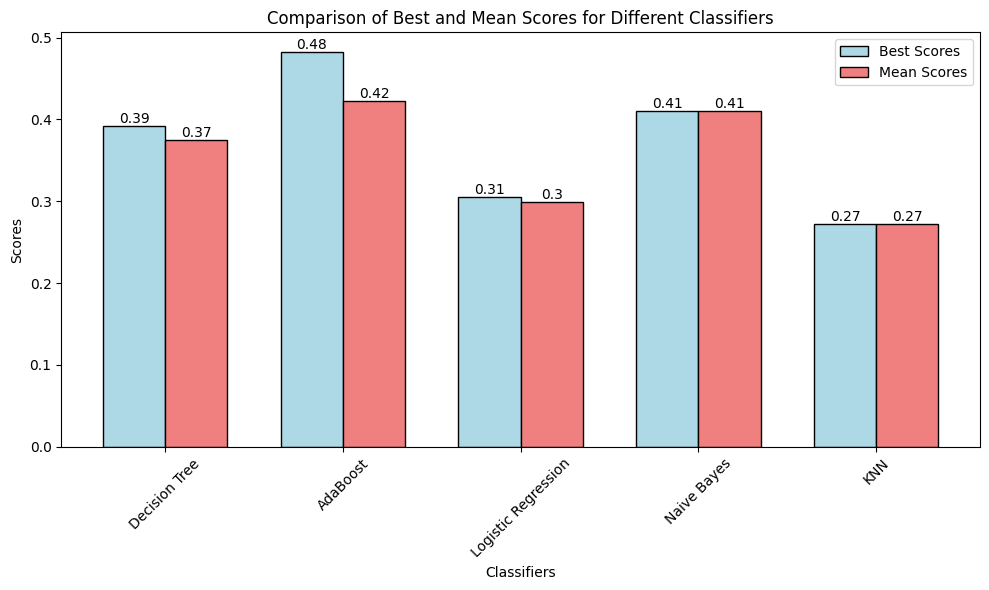

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classifiers and their corresponding scores
classifiers = ['Decision Tree', 'AdaBoost', 'Logistic Regression', 'Naive Bayes', 'KNN']

# Get the best mean cross-validated scores from the respective GridSearchCV objects
best_scores = [grid_search.best_score_, adaboost_GridSearch.best_score_, gridsearch_lg.best_score_, mean_accuracy_naive_bayes, knn_mean_score]

# Get the mean scores from cross-validation
mean_scores = [cv_decisiontree.mean(), adaboost_cv_scores.mean(), cv_scores_lg.mean(), mean_accuracy_naive_bayes, knn_mean_score]

# Set the width of the bars
bar_width = 0.35

# Calculate the positions for the bars
index = np.arange(len(classifiers))

# Define the colors for the bars
best_scores_color = 'lightblue'
mean_scores_color = 'lightcoral'

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, best_scores, bar_width, label='Best Scores', color=best_scores_color, edgecolor='black')
plt.bar(index + bar_width, mean_scores, bar_width, label='Mean Scores', color=mean_scores_color, edgecolor='black')

# Add value labels above each bar
for i in range(len(index)):
    plt.text(i, best_scores[i], round(best_scores[i], 2), ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width, mean_scores[i], round(mean_scores[i], 2), ha='center', va='bottom', fontsize=10)

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Comparison of Best and Mean Scores for Different Classifiers')
plt.legend()
plt.xticks(index + bar_width/2, classifiers, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
